# Breast Cancer Detection with Linear Discriminant Analysis (LDA)

This project leverages Linear Discriminant Analysis (LDA) to classify breast tumors as benign or malignant using features extracted from cell nuclei images. LDA is a powerful supervised machine learning technique that seeks the optimal linear combination of features to maximize the separation between classes.

By applying LDA to this medical dataset, we aim to:
- Build an interpretable model for early breast cancer detection,
- Visualize the separation between benign and malignant cases,
- Assess the effectiveness of LDA for this critical diagnostic task.

This analysis not only demonstrates the practical utility of LDA in biomedical applications, but also provides insights into which features are most informative for distinguishing between tumor types.

## Data Features

This dataset contains the following 30 features extracted from digitized images of fine needle aspirate (FNA) of breast masses:

| Feature Name                | Description                                      |
|-----------------------------|--------------------------------------------------|
| mean radius                 | Mean of distances from center to points on perimeter |
| mean texture                | Standard deviation of gray-scale values          |
| mean perimeter              | Mean size of the perimeter                       |
| mean area                   | Mean area of the cell nuclei                     |
| mean smoothness             | Mean of local variation in radius lengths        |
| mean compactness            | Mean of perimeter² / area - 1.0                  |
| mean concavity              | Mean severity of concave portions of the contour |
| mean concave points         | Mean number of concave portions of the contour   |
| mean symmetry               | Mean symmetry of the cell nuclei                 |
| mean fractal dimension      | Mean complexity of the cell border               |
| radius error                | Standard error of the radius                     |
| texture error               | Standard error of the texture                    |
| perimeter error             | Standard error of the perimeter                  |
| area error                  | Standard error of the area                       |
| smoothness error            | Standard error of the smoothness                 |
| compactness error           | Standard error of the compactness                |
| concavity error             | Standard error of the concavity                  |
| concave points error        | Standard error of the concave points             |
| symmetry error              | Standard error of the symmetry                   |
| fractal dimension error     | Standard error of the fractal dimension          |
| worst radius                | Largest mean value for radius                    |
| worst texture               | Largest mean value for texture                   |
| worst perimeter             | Largest mean value for perimeter                 |
| worst area                  | Largest mean value for area                      |
| worst smoothness            | Largest mean value for smoothness                |
| worst compactness           | Largest mean value for compactness               |
| worst concavity             | Largest mean value for concavity                 |
| worst concave points        | Largest mean value for concave points            |
| worst symmetry              | Largest mean value for symmetry                  |
| worst fractal dimension     | Largest mean value for fractal dimension         |

**Target:**  
- Tumor class (benign or malignant)

**Data Source:**  
[UCI Machine Learning Repository: Breast Cancer Wisconsin (Diagnostic) Data Set](https://archive.ics.uci.edu/ml/datasets/breast+cancer+wisconsin+(diagnostic))

## 1. Import Libraries

In this section, we import all the essential libraries required for data analysis, visualization, and modeling.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import confusion_matrix, classification_report

import matplotlib_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('svg')


## 2. Load the Dataset

In this step, we will load the breast cancer dataset containing features extracted from digitized images of cell nuclei. The data will be read into a pandas DataFrame for further exploration and analysis.

We will also take a quick look at the first few rows to ensure the data has loaded correctly and to get an initial sense of its structure.


In [2]:
data = load_breast_cancer()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target

In [3]:

df.head()

mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   mean fractal dimension  ...  worst texture  worst perimeter  worst area  \
0                 0.07871  ...          17.33           184.60      2019.0   
1                 0.05667  ...          23.41           158.80      1956.0   
2                 0.05999  ...          25.53           152.50      1709.0   
3                 0.09744  ...          26.50            98.87       567.7   
4                 0.05883  ...          16.67           152.20      1575.0   

   worst smoothness  worst compactness  worst concavity  worst concave points  \
0            0.1622             0.6656           0.7119                0.2654   
1            0.1238             0.1866           0.2416                0.1860   
2            0.1444             0.4245           0.4504                0.2430   
3            0.2098             0.8663           0.6869                0.2575   
4            0.1374             0.2050           0.4000                0.1625   

   worst symmetry  worst fractal dimension  target  
0          0.4601                  0.11890       0  
1          0.2750                  0.08902       0  
2          0.3613                  0.08758       0  
3          0.6638                  0.17300       0  
4          0.2364                  0.07678       0  

[5 rows x 31 columns]

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [5]:
df.isnull().sum()

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
target                     0
dtype: int64

## 3. Exploratory Data Analysis (EDA)

Let’s take a closer look at the breast cancer dataset:

- **Check the class distribution** (benign vs malignant) to see if the data is balanced.
- **Visualize feature distributions** for a few key variables.

### 3.1 Class Balance

Let's start by visualizing the distribution of tumor classes (benign vs malignant) in the dataset. This helps us check for any class imbalance that could affect model training and evaluation.

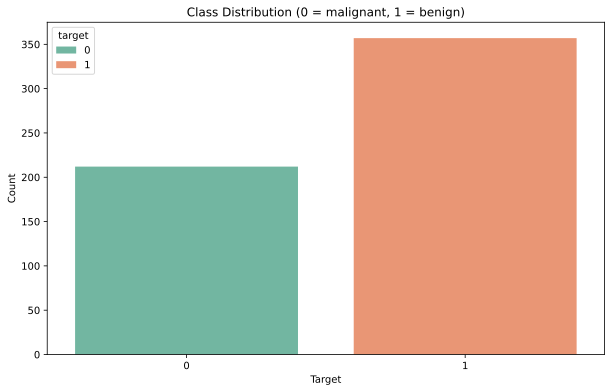

In [6]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='target',hue='target',palette='Set2')
plt.title('Class Distribution (0 = malignant, 1 = benign)')
plt.xlabel('Target')
plt.ylabel('Count')
plt.savefig('visualisations/class_distribution.svg')


### 3.2 Violin Plot for Feature Comparison

Violin plots combine boxplots and density plots, making it easy to compare the distribution of a feature between benign and malignant tumors.

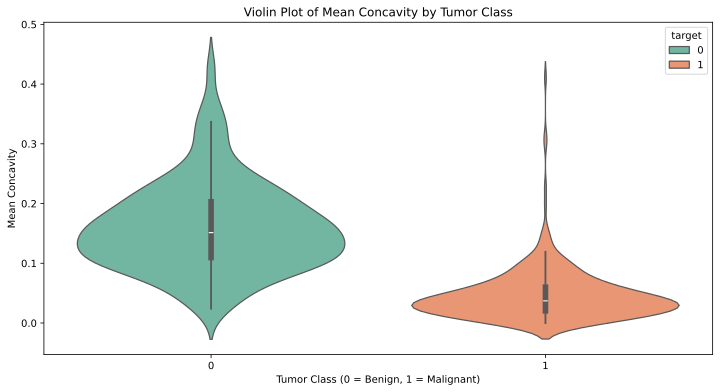

In [7]:
plt.figure(figsize=(12,6))
sns.violinplot(x='target', y='mean concavity', data=df,hue='target', palette='Set2')
plt.title('Violin Plot of Mean Concavity by Tumor Class')
plt.xlabel('Tumor Class (0 = Benign, 1 = Malignant)')
plt.ylabel('Mean Concavity')
plt.savefig('visualisations/violin_plot_mean_concavity.svg')

### 3.2 Outlier Detection with Boxplots

Boxplots for each feature can help identify outliers that may affect model performance.

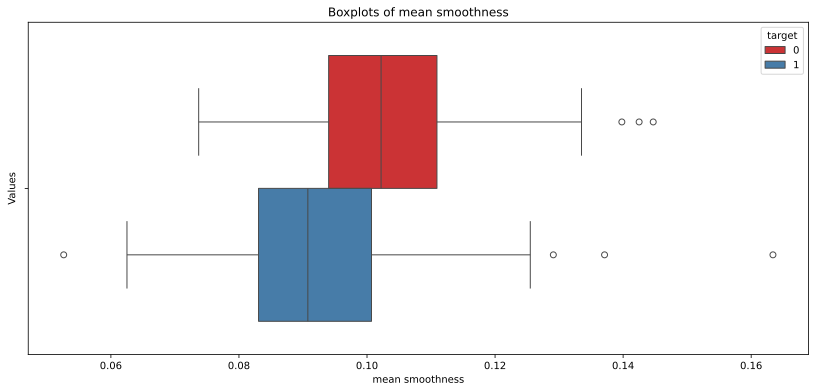

In [8]:
plt.figure(figsize=(14,6))
sns.boxplot(data=df,x='mean smoothness',hue='target',palette='Set1')
plt.title('Boxplots of mean smoothness')
plt.xlabel('mean smoothness')
plt.ylabel('Values')
plt.savefig('visualisations/boxplot_mean_smoothness.svg')


### 3.3 Comparison of Mean Radius by Tumor Class (KDE Plot)

To see how `mean radius` differs between benign and malignant tumors, let's plot the KDE for each class.

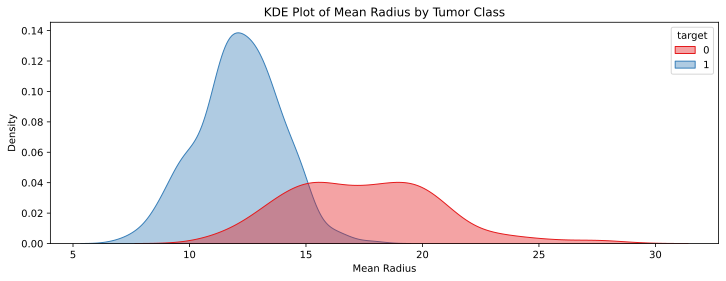

In [9]:
plt.figure(figsize=(12,4))
sns.kdeplot(data=df, x='mean radius', hue='target', fill=True, palette='Set1', alpha=0.4)
plt.title('KDE Plot of Mean Radius by Tumor Class')
plt.xlabel('Mean Radius')
plt.ylabel('Density')
plt.savefig('visualisations/kde_mean_radius.svg')

### 3.4 Histograms of Multiple Features

To compare the distributions of several important features, I’ll plot histograms for `mean radius`, `mean texture`, `mean area`, and `mean smoothness`.

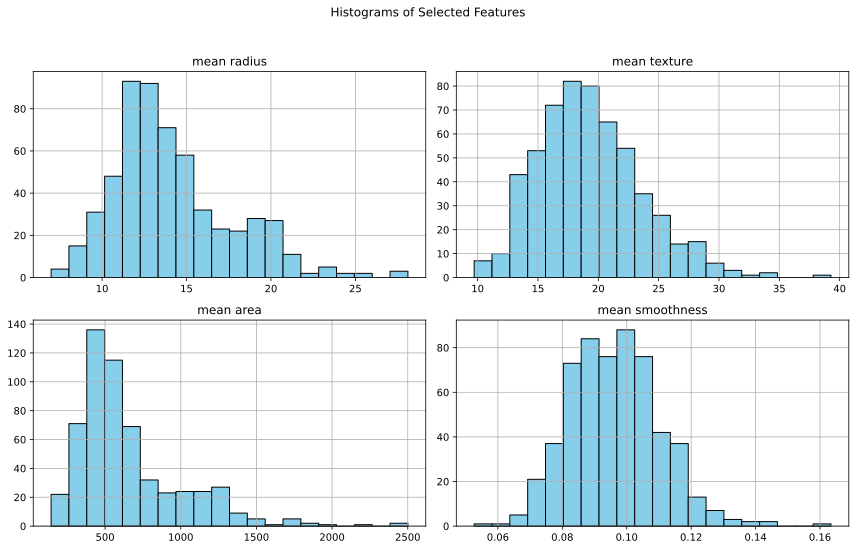

In [10]:
features = ['mean radius', 'mean texture', 'mean area', 'mean smoothness']
df[features].hist(bins=20, figsize=(12,8), layout=(2,2), color='skyblue', edgecolor='black')
plt.suptitle('Histograms of Selected Features')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.savefig('visualisations/histograms.svg')


### 3.5 Joint Distribution of Mean Compactness and Mean Concavity

A scatterplot of `mean compactness` vs `mean concavity`, colored by tumor class, can reveal how these two features interact and whether they help separate benign from malignant tumors.

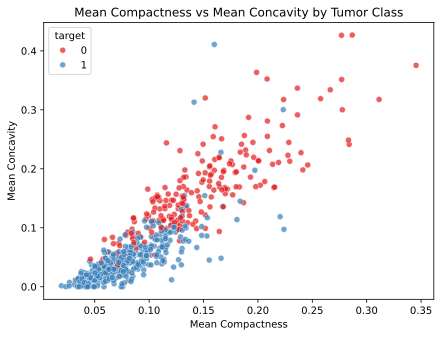

In [11]:
plt.figure(figsize=(7,5))
sns.scatterplot(
    data=df,
    x='mean compactness',
    y='mean concavity',
    hue='target',
    palette='Set1',
    alpha=0.7
)
plt.title('Mean Compactness vs Mean Concavity by Tumor Class')
plt.xlabel('Mean Compactness')
plt.ylabel('Mean Concavity')
plt.savefig('visualisations/mean_compactness_vs_mean_concavity.svg')

### 3.6 Scatterplot: Texture Error vs. Smoothness Error

This scatterplot shows the relationship between `texture error` and `smoothness error` for each tumor, colored by class. It can help reveal whether errors in these measurements are informative for classification.

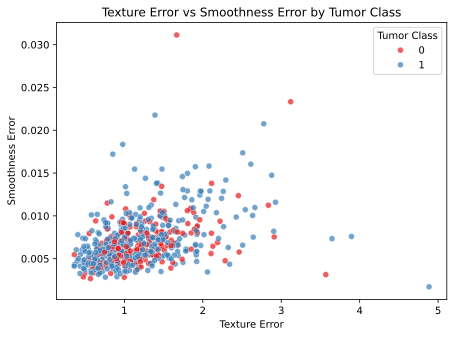

In [12]:
plt.figure(figsize=(7,5))
sns.scatterplot(
    data=df,
    x='texture error',
    y='smoothness error',
    hue='target',
    palette='Set1',
    alpha=0.7
)
plt.title('Texture Error vs Smoothness Error by Tumor Class')
plt.xlabel('Texture Error')
plt.ylabel('Smoothness Error')
plt.legend(title='Tumor Class')
plt.savefig('visualisations/texture_error_vs_smoothness_error.svg')

### 3.7 Scatterplot: Mean Fractal Dimension vs. Mean Symmetry

This plot explores the relationship between `mean fractal dimension` and `mean symmetry`, colored by tumor class, to see if the shape complexity and symmetry of nuclei are useful for distinguishing between benign and malignant tumors.

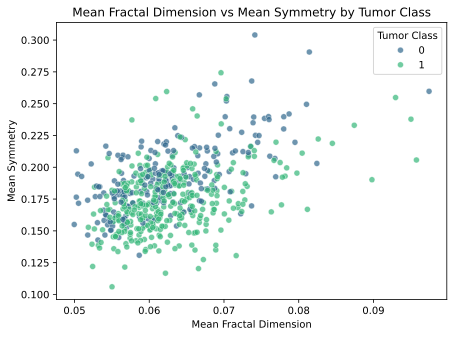

In [13]:
plt.figure(figsize=(7,5))
sns.scatterplot(
    data=df,
    x='mean fractal dimension',
    y='mean symmetry',
    hue='target',
    palette='viridis',
    alpha=0.7
)
plt.title('Mean Fractal Dimension vs Mean Symmetry by Tumor Class')
plt.xlabel('Mean Fractal Dimension')
plt.ylabel('Mean Symmetry')
plt.legend(title='Tumor Class')
plt.savefig('visualisations/mean_fractal_dimension_vs_mean_symmetry.svg')

### 3.8 Correlation Heatmap

A correlation heatmap helps visualize relationships between all numerical features. This allows us to spot highly correlated variables, which can inform feature selection and model interpretation.

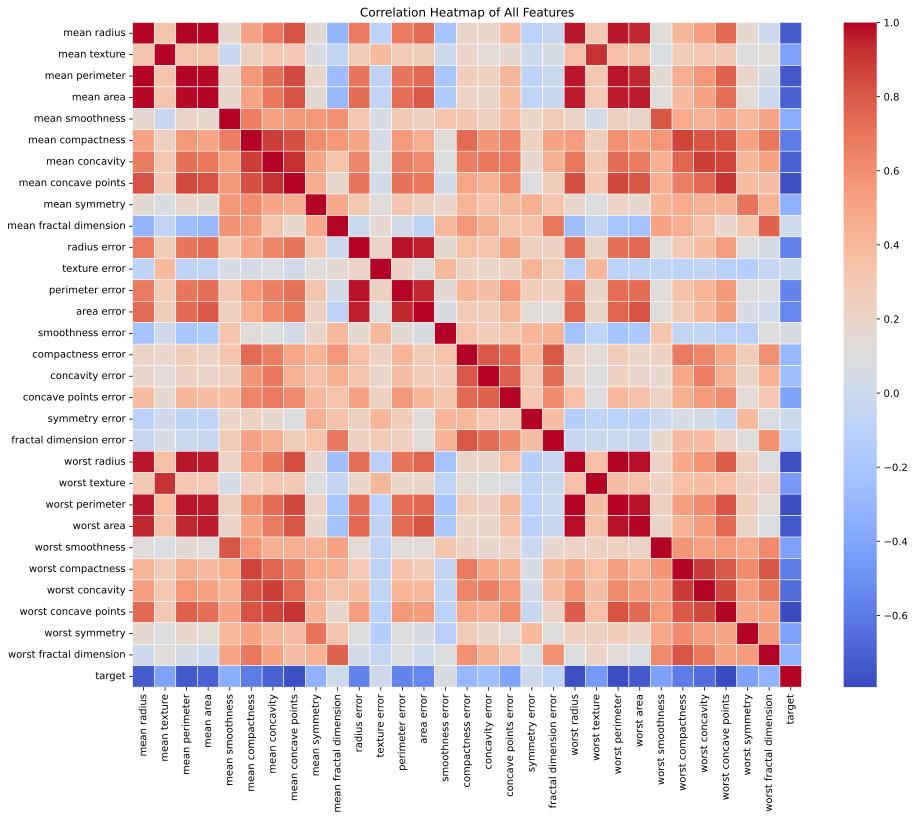

In [14]:
plt.figure(figsize=(15,12))
sns.heatmap(df.corr(), cmap='coolwarm', annot=False, linewidths=0.5)
plt.title('Correlation Heatmap of All Features')
plt.savefig('visualisations/correlation_heatmap.svg')


### 3.9 Pairplot of Selected Features

By plotting a pairplot of a few important features, colored by tumor class, we can visually assess how well these variables separate benign and malignant cases.

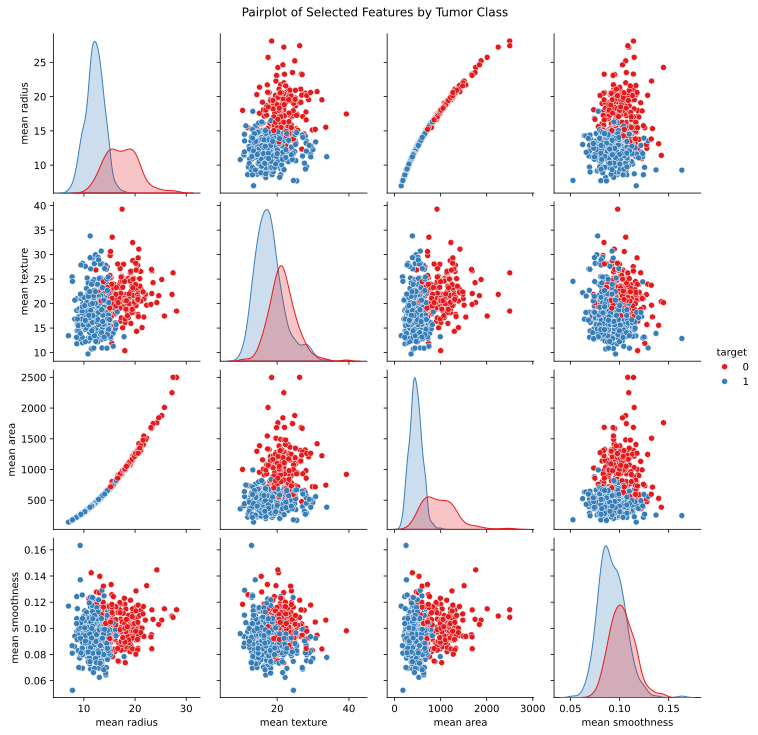

In [15]:
selected_features = ['mean radius', 'mean texture', 'mean area', 'mean smoothness']
sns.pairplot(df[selected_features + ['target']], hue='target', palette='Set1')
plt.suptitle('Pairplot of Selected Features by Tumor Class', y=1.02)
plt.savefig('visualisations/pairplot_selected_features.svg')


### 3.10 Pairplot of Advanced Error Features

To explore relationships among higher-order error features, we'll use a pairplot for `perimeter error`, `area error`, and `concavity error`, colored by tumor class.

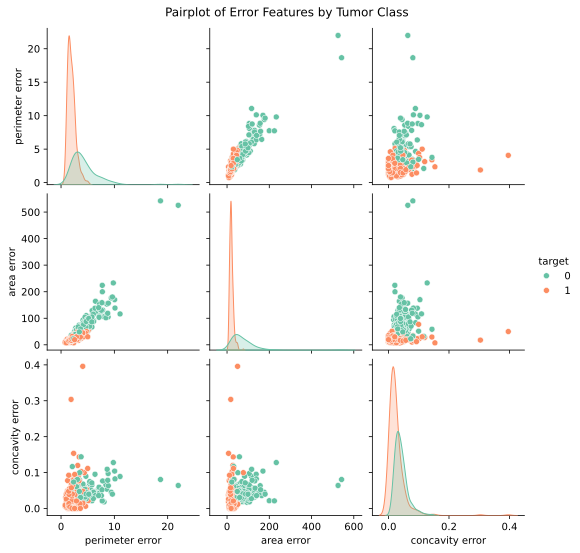

In [16]:
advanced_features = ['perimeter error', 'area error', 'concavity error']
sns.pairplot(df[advanced_features + ['target']], hue='target', palette='Set2')
plt.suptitle('Pairplot of Error Features by Tumor Class', y=1.02)
plt.savefig('visualisations/error_pairplot.svg')

## 4. Data Preparation: Feature Scaling and Train-Test Split

This section prepares the dataset for modeling by performing the following steps:

- Separating the features (X) from the target variable (y).
- Scaling the feature values to ensure all variables are on a comparable scale.
- Splitting the dataset into training and testing sets to enable robust model evaluation.

These steps are essential for achieving reliable and interpretable results, particularly when using algorithms like LDA that are sensitive to feature scaling and require proper validation.


### Splitting Features and Target

The features (`X`) and the target variable (`y`) are separated before modeling. All columns except the target are included in `X`, while the target column (`target`) is assigned to `y`. This separation is necessary for supervised learning algorithms, which require clear distinction between input variables and the prediction target.

In [17]:
X = df.drop('target', axis=1)
y = df['target']
print('X shape:', X.shape)
print('y shape:', y.shape)

X shape: (569, 30)
y shape: (569,)


### Train-Test Split

The dataset is split into training and testing sets to enable robust evaluation of model performance. Stratified sampling is used to ensure that both sets maintain the same proportion of classes as the original data. Here, 80% of the data is used for training and 20% for testing.

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

The `stratify=y` parameter ensures that the class proportions in the target variable (`y`) are preserved in both the training and testing sets.

In [19]:
print('X_train shape:', X_train.shape)
print('X_test shape:', X_test.shape)
print('y_train shape:', y_train.shape)
print('y_test shape:', y_test.shape)

X_train shape: (455, 30)
X_test shape: (114, 30)
y_train shape: (455,)
y_test shape: (114,)


### Feature Scaling

Standardization is applied to the feature data using `StandardScaler`. This process transforms the features to have zero mean and unit variance, ensuring that all variables contribute equally to the analysis. Scaling is performed using statistics from the training set and then applied to both the training and testing data.

In [20]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## 5. Linear Discriminant Analysis (LDA)

In this section, Linear Discriminant Analysis (LDA) is applied to the training data. LDA is a supervised dimensionality reduction technique that seeks to maximize the separation between classes by projecting the data onto a lower-dimensional space. The model is trained on the training set and then used to transform both the training and testing features for further analysis and visualization.

In [21]:
lda  = LinearDiscriminantAnalysis()

# Fit the model
lda.fit(X_train, y_train)

LinearDiscriminantAnalysis()

### Suppressing Warnings During Grid Search

To keep the output clean and focused, all warnings generated during the grid search fitting process are suppressed using a context manager. This ensures that only relevant results and progress updates are displayed, without interruption from warning messages.

## 6. Model Evaluation

After training the LDA model, its performance is assessed on the test set. Evaluation metrics such as accuracy, confusion matrix, and classification report are used to measure how well the model distinguishes between benign and malignant tumors. Visualizations may also be included to provide further insight into the model’s predictions and any areas for improvement.

### Making Predictions on the Test Set

The trained LDA model is used to generate predictions on the test set. These predictions are then compared to the true class labels to evaluate the model’s performance using various metrics.

In [22]:
preds = lda.predict(X_test)

### Classification Report

A classification report summarizes the model’s performance by providing precision, recall, and f1-score for each class, along with overall accuracy. These metrics help assess how well the model distinguishes between benign and malignant tumors in the test set.

In [23]:
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       0.97      0.90      0.94        42
           1       0.95      0.99      0.97        72

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



### Confusion Matrix

A confusion matrix provides a visual summary of the model’s predictions compared to the true class labels. It shows the number of correct and incorrect predictions for each class, helping to identify any patterns of misclassification. The matrix is saved as an SVG file for high-quality visualization and future reference.

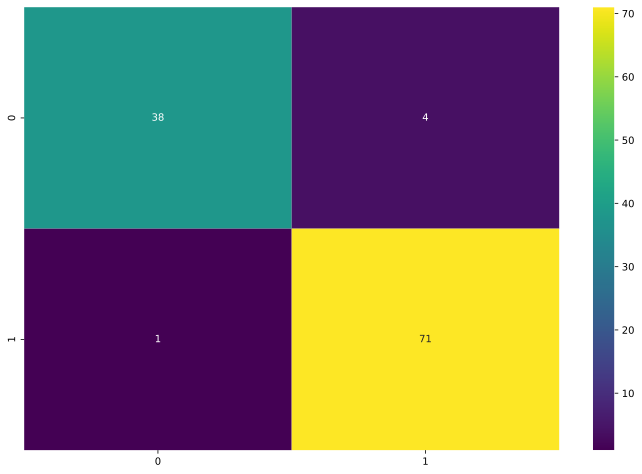

In [25]:
cm = confusion_matrix(y_test, preds)
plt.figure(figsize=(12,8))
sns.heatmap(cm, annot=True,fmt='d',cmap='viridis')
plt.savefig('visualisations/confusion_matrix.svg');

## 7. Visualization of LDA Components

The reduced feature space obtained from Linear Discriminant Analysis (LDA) can be visualized to assess how well the classes are separated. By plotting the data projected onto the first LDA component (or the first two components if available), it is possible to visually evaluate the effectiveness of LDA in distinguishing between benign and malignant tumors.

### 8.1 Distribution of the First LDA Component

A histogram (or KDE plot) of the first LDA component, colored by class, shows how well LDA separates benign and malignant tumors along the main discriminant axis.

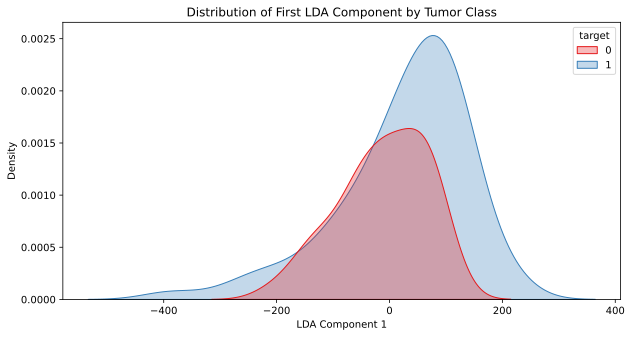

In [ ]:
# Project the test set onto the first LDA component
X_test_lda = lda.transform(X_test_scaled)

plt.figure(figsize=(10,5))
sns.kdeplot(x=X_test_lda[:, 0], hue=y_test, fill=True, palette='Set1', alpha=0.3)
plt.title('Distribution of First LDA Component by Tumor Class')
plt.xlabel('LDA Component 1')
plt.ylabel('Density')
plt.savefig('visualisations/lda_kde.svg')

### 8.2 1D LDA Projection 

This plot shows the training samples projected onto the first linear discriminant (LD1). Each point is colored by its class label, providing a clear visual of how well LDA separates the two classes along the main discriminant axis.

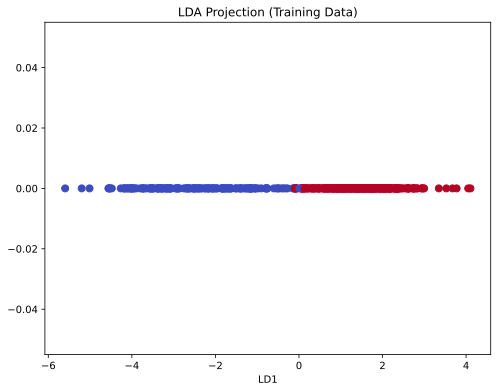

In [ ]:
plt.figure(figsize=(8,6))
plt.scatter(X_train_lda[:,0], np.zeros_like(X_train_lda[:,0]), c=y_train, cmap='coolwarm', s=50)
plt.title('LDA Projection (Training Data)')
plt.xlabel('LD1')
plt.savefig('visualisations/lda_train.svg')


## 9 Model Persistence

To enable future use of the trained LDA model without retraining, the model is saved to disk using `joblib`. This allows for efficient loading and deployment of the model in other applications or analysis pipelines.

In [ ]:
import joblib

### Saving the Scaler

The feature scaler, fitted on the complete dataset, is also saved using `joblib`. This ensures that any future data can be transformed in the same way as the training data, maintaining consistency during model deployment or inference.

In [ ]:
scaler_full = StandardScaler().fit(X)
joblib.dump(scaler_full, 'models/scaler.joblib')

['models/scaler.joblib']

### Saving the Trained LDA Model

The LDA model trained on the training set is saved to disk using `joblib`. This allows for easy reuse of the trained model without the need to retrain, making future predictions or deployment more efficient.

In [ ]:
lda = LinearDiscriminantAnalysis().fit(X_train, y_train)
# Save the trained LDA model
joblib.dump(lda, 'models/lda_model.joblib')

['models/lda_model.joblib']

### Loading the Saved LDA Model

To use the saved LDA model for future predictions or analysis, it can be loaded from disk using `joblib.load()`. This restores the trained model without the need for retraining.

In [ ]:
# To load the model later:
#lda_loaded = joblib.load('models/lda_model.joblib')

## 10. Conclusion

- Linear Discriminant Analysis (LDA) successfully separated benign and malignant tumor classes with high accuracy on this dataset.
- The results demonstrate that LDA is a powerful technique when the classes are approximately linearly separable.
- For further improvement and robust evaluation, consider applying cross-validation and comparing LDA’s performance with other classifiers such as Quadratic Discriminant Analysis (QDA) and Logistic Regression.